# 5. K Means Algorithm

In [1]:
# Import pandas library for data manipulation
import pandas as pd

# Import numpy library for numerical operations  
import numpy as np  

# Import matplotlib for plotting
import matplotlib.pyplot as plt

# Import seaborn for data visualization
import seaborn as sns

# Import the KMeans class from scikit-learn
from sklearn.cluster import KMeans

In [2]:
# Load the Iris dataset
df = sns.load_dataset("iris")

# Display the first few rows of the dataset
print(df.head())


   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [3]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


In [4]:
# Shows a tuple with row and column size
df.shape 

(150, 5)

In [5]:
# Display a concise summary of the DataFrame, including the number of non-null entries and data types of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
# Get the description of the dataset
description = df.describe()
print(description)

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


### 1.Sepal Length vs Sepal Width Distribution Across Species
Different species exhibit varying distributions of sepal length and width. This scatter plot can help us understand how the species are separated based on these two features.

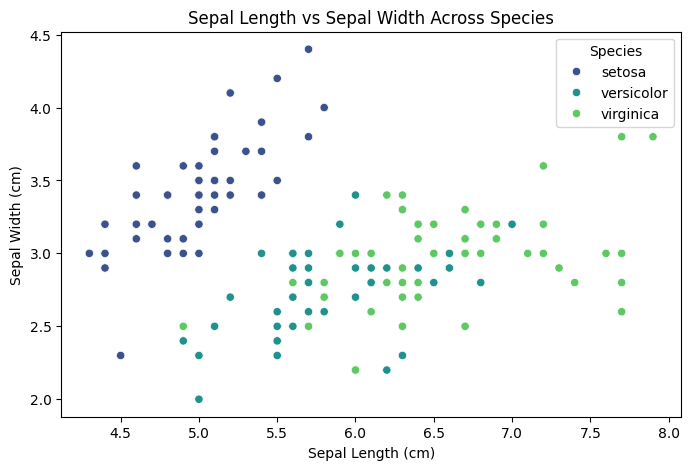

In [7]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='sepal_length', y='sepal_width', hue='species', data=df, palette='viridis')
plt.title("Sepal Length vs Sepal Width Across Species")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.legend(title="Species")
plt.show()

### 2.Petal Length vs Petal Width Variation Across Species
Petal dimensions are more useful in distinguishing different species compared to sepal dimensions.

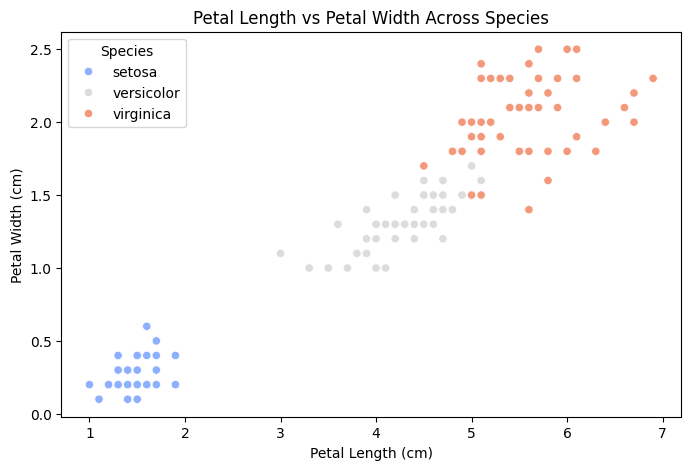

In [8]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='petal_length', y='petal_width', hue='species', data=df, palette='coolwarm')
plt.title("Petal Length vs Petal Width Across Species")
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.legend(title="Species")
plt.show()


### 3.Boxplot of Sepal Length for Each Species
This helps visualize how the sepal length varies across different species and highlights any outliers.

C:\Users\nikhi\AppData\Local\Temp\ipykernel_21320\3733571508.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Species")


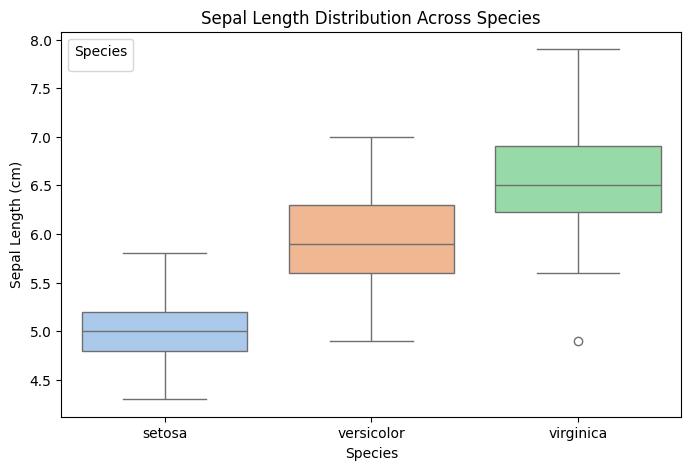

In [9]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='species', y='sepal_length', data=df, hue='species', palette='pastel', dodge=False)
plt.title("Sepal Length Distribution Across Species")
plt.xlabel("Species")
plt.ylabel("Sepal Length (cm)")
plt.legend(title="Species")
plt.show()


In [10]:
# Extract features (we'll use only sepal length and sepal width)
x = df[['sepal_length', 'sepal_width']]

In [11]:
# Load the penguins dataset
data = sns.load_dataset("penguins")
data

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [12]:
# Display a concise summary of the DataFrame, including the number of non-null entries and data types of each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [13]:
# Get the description of the dataset
description = data.describe()
print(description)

       bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
count      342.000000     342.000000         342.000000   342.000000
mean        43.921930      17.151170         200.915205  4201.754386
std          5.459584       1.974793          14.061714   801.954536
min         32.100000      13.100000         172.000000  2700.000000
25%         39.225000      15.600000         190.000000  3550.000000
50%         44.450000      17.300000         197.000000  4050.000000
75%         48.500000      18.700000         213.000000  4750.000000
max         59.600000      21.500000         231.000000  6300.000000


In [14]:
# Check for missing values
missing_values = data.isnull().sum()
print(missing_values)

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64


In [15]:
data['species'].value_counts()


species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

### 1.Body Mass Differences Between Male and Female Penguins
Male penguins tend to have higher body mass compared to females.

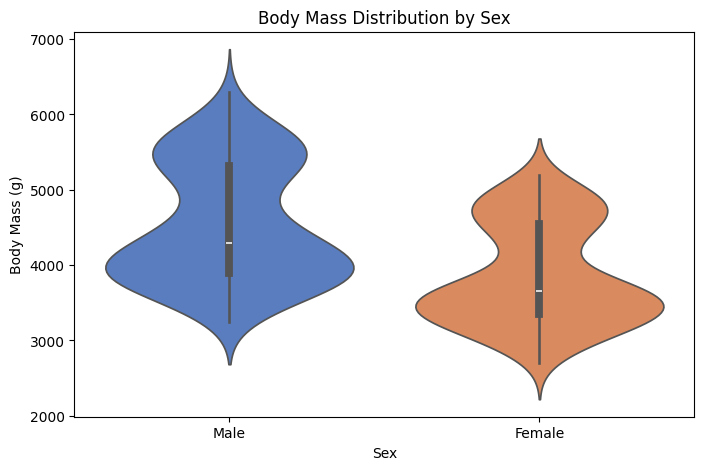

In [16]:
plt.figure(figsize=(8, 5))
sns.violinplot(x="sex", y="body_mass_g", hue="sex", data=data, palette="muted", legend=False)
plt.title("Body Mass Distribution by Sex")
plt.xlabel("Sex")
plt.ylabel("Body Mass (g)")
plt.show()

### 2.Island-Wise Distribution of Penguins
Certain penguin species are more common on specific islands.

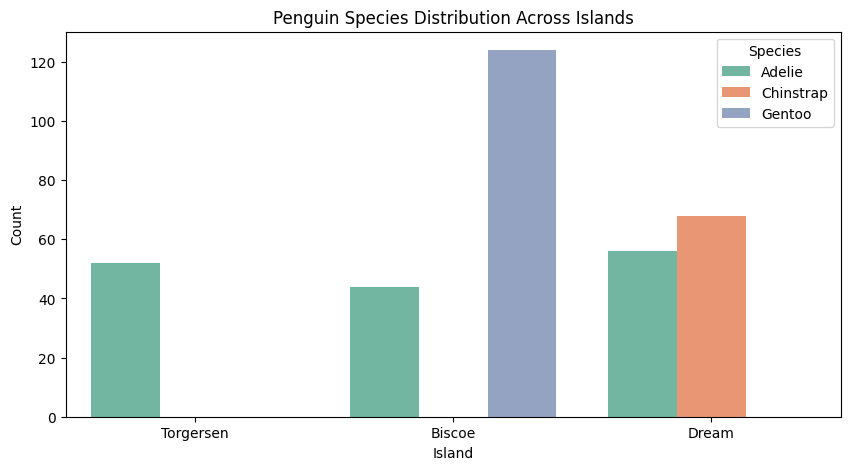

In [17]:
plt.figure(figsize=(10, 5))
sns.countplot(x="island", hue="species", data=data, palette="Set2")
plt.title("Penguin Species Distribution Across Islands")
plt.xlabel("Island")
plt.ylabel("Count")
plt.legend(title="Species")
plt.show()

### 3.Distribution of Flipper Length by Species
Flipper length varies among species and could be an important distinguishing feature.

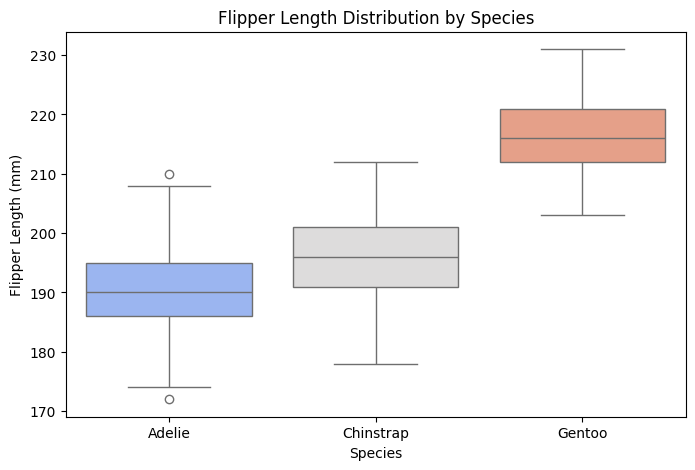

In [18]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="species", y="flipper_length_mm", hue="species", data=data, palette="coolwarm", legend=False)
plt.title("Flipper Length Distribution by Species")
plt.xlabel("Species")
plt.ylabel("Flipper Length (mm)")
plt.show()



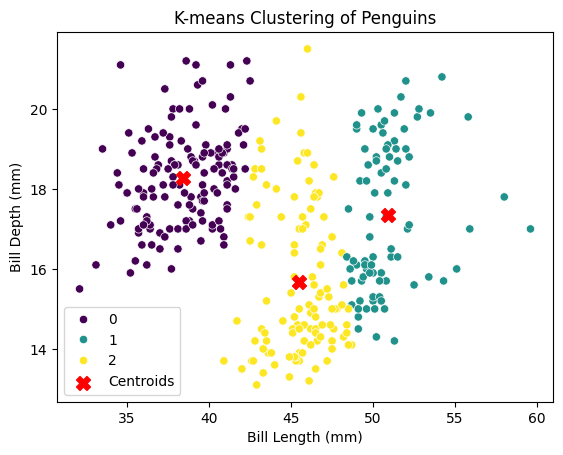

In [19]:
from sklearn.cluster import KMeans

# Load the penguins dataset
penguins = sns.load_dataset("penguins")

# Drop rows with missing values
penguins.dropna(inplace=True)

# Select features for clustering
X = penguins[['bill_length_mm', 'bill_depth_mm']]


# Instantiate KMeans
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit KMeans
kmeans.fit(X)

# Add cluster labels to the dataset
penguins['cluster'] = kmeans.labels_

# Plot the clusters
sns.scatterplot(data=penguins, x='bill_length_mm', y='bill_depth_mm', hue='cluster', palette='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='X', s=100, c='red', label='Centroids')
plt.title('K-means Clustering of Penguins')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Bill Depth (mm)')
plt.legend()
plt.show()


In [20]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,cluster
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,0
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,0
...,...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female,2
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female,2
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male,1
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female,2


In [21]:
# Perform K-means clustering
kmeans = KMeans(n_clusters=2, random_state=42)  # Assuming we want to find 2 clusters
kmeans.fit(x)

KMeans(n_clusters=2, random_state=42)

In [22]:
# Get cluster centers and labels
centers = kmeans.cluster_centers_
labels = kmeans.labels_
centers


array([[5.15      , 3.16891892],
       [6.51842105, 2.94868421]])

In [23]:
from sklearn.metrics import silhouette_score

In [24]:
silhouette_avg = silhouette_score(x, labels)
print("The silhouette score is:", silhouette_avg)

The silhouette score is: 0.4644681851183547


In [25]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

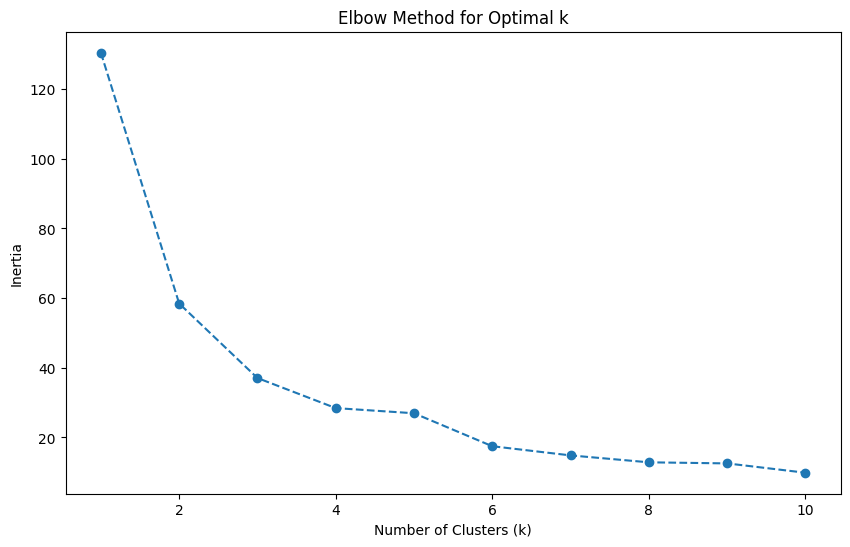

In [26]:
# Initialize an empty list to store inertia values for different k values
inertia = []

# Loop through k values from 1 to 10
for k in range(1, 11):
    # Create a KMeans instance with current k value
    kmeans = KMeans(n_clusters=k, random_state=42)
    
    # Fit the KMeans model to the data
    kmeans.fit(x)
    
    # Append the inertia value (sum of squared distances of samples to their closest cluster center) to the list
    inertia.append(kmeans.inertia_)

# Plot the inertia values against the number of clusters (k)
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()


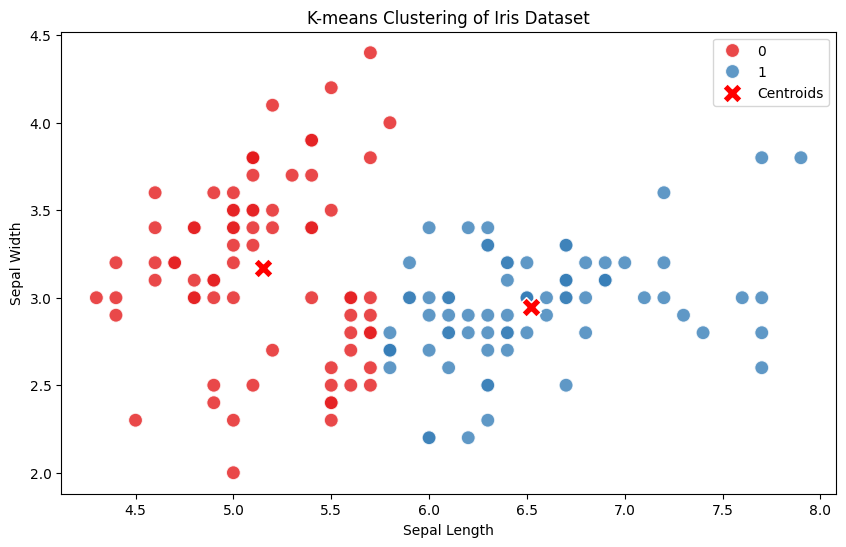

In [27]:
# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sepal_length', y='sepal_width', data=df, hue=labels, palette='Set1', s=100, alpha=0.8)
sns.scatterplot(x=centers[:, 0], y=centers[:, 1], color='red', marker='X', s=200, label='Centroids')
plt.title('K-means Clustering of Iris Dataset')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.show()